# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder , StandardScaler


import warnings
warnings.filterwarnings('ignore')

# Load Data and Get Info

In [126]:
obesity_train=pd.read_csv('/content/train.csv')

In [127]:
obesity_test=pd.read_csv('/content/test.csv')

In [128]:
obesity_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [129]:
obesity_train.shape

(20758, 18)

In [11]:
obesity_train.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
8045,8045,Male,18.000000,1.783914,108.251044,yes,yes,2.000000,2.120936,Sometimes,no,2.111913,no,1.000000,0.000000,no,Public_Transportation,Obesity_Type_I
8046,8046,Male,27.394123,1.755978,112.256165,yes,yes,1.369529,3.000000,Sometimes,no,2.011023,no,0.038809,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
8047,8047,Male,26.000000,1.700000,75.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_I
8048,8048,Male,21.140165,1.807029,75.688433,yes,yes,2.000000,3.000000,Sometimes,no,1.791286,no,1.601950,0.965464,Sometimes,Public_Transportation,Overweight_Level_I
8049,8049,Male,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
obesity_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

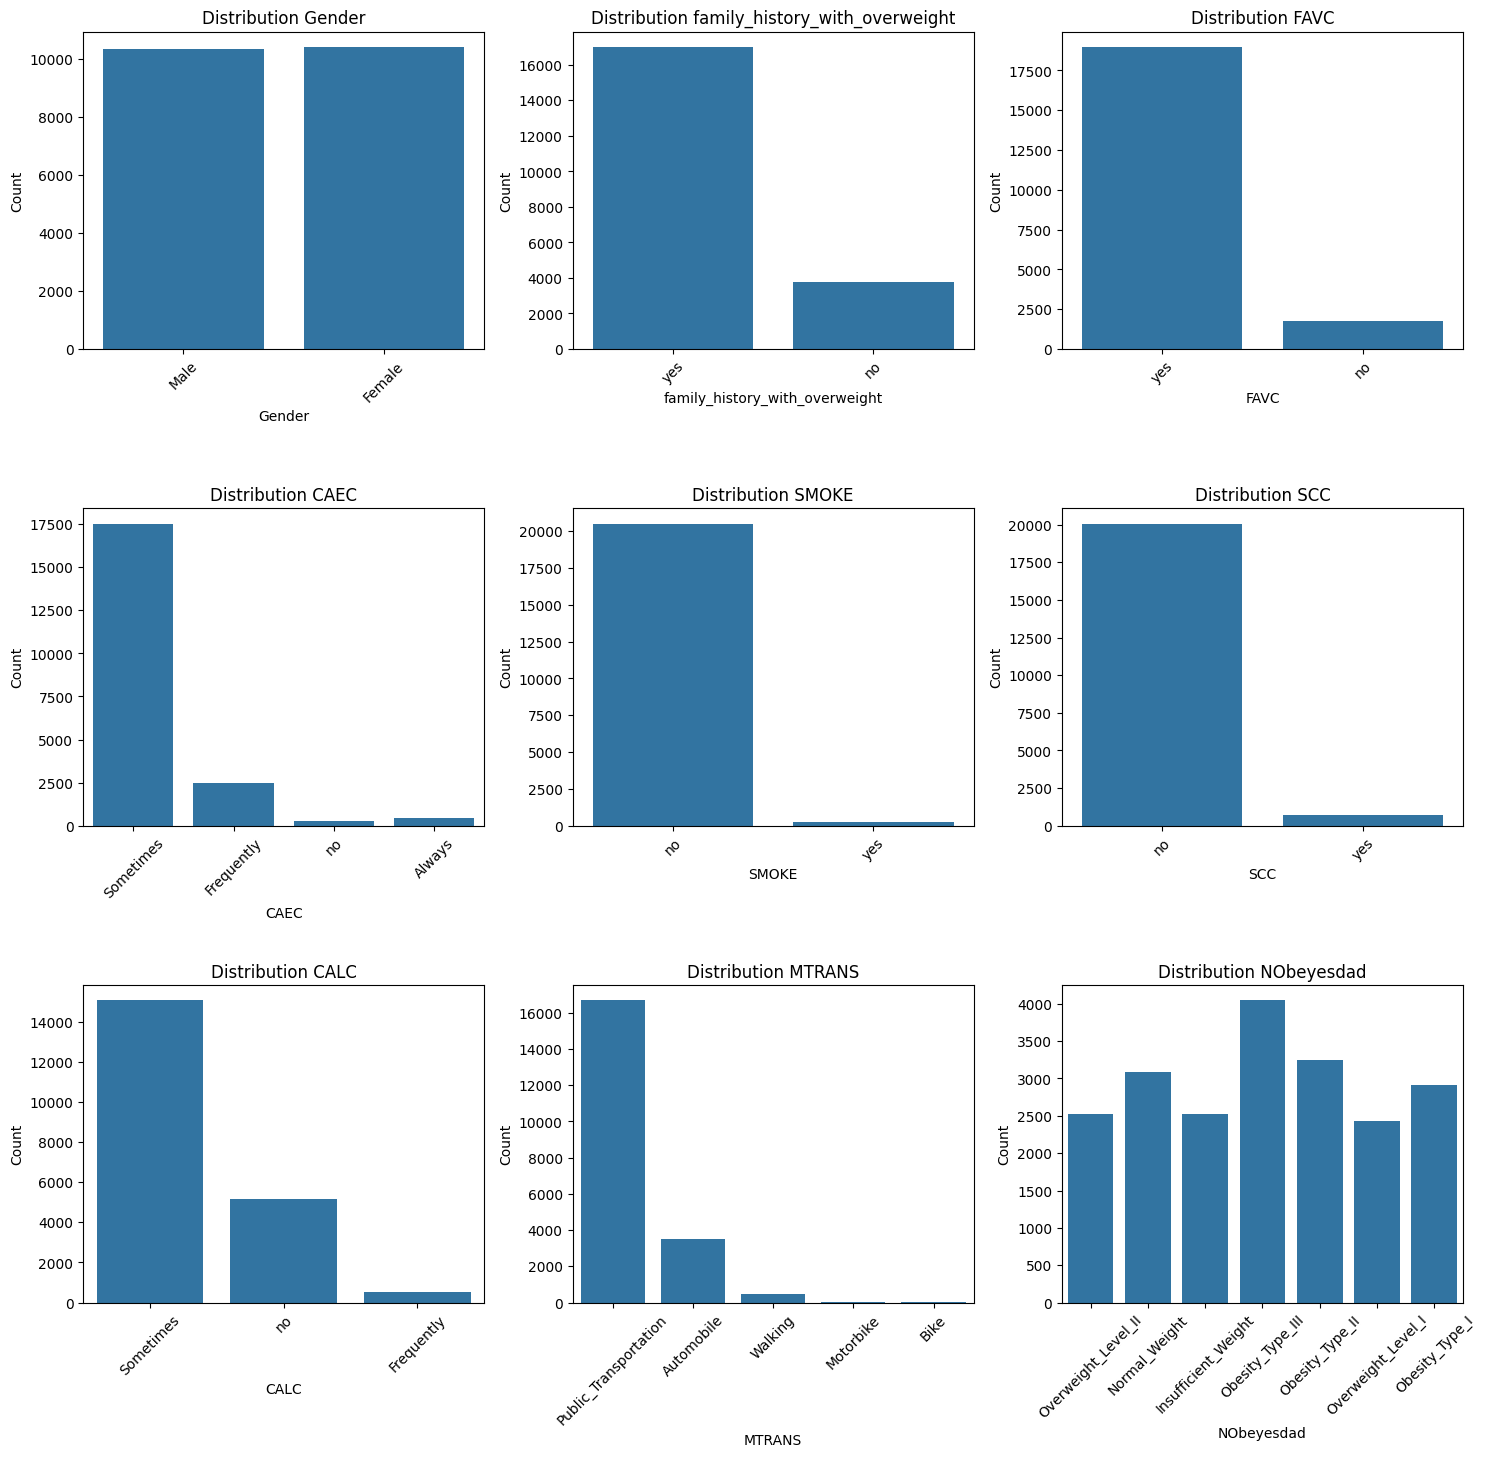

In [132]:
non_numeric_columns = obesity_train.select_dtypes(include=['object', 'category']).columns

# Check for non-numeric columns
if len(non_numeric_columns) == 0:
    print("There are no non-numeric columns in the dataset.")
else:
    # build of distribution graphs for all non-numeric features
    plt.figure(figsize=(15, len(non_numeric_columns) * 2))
    for i, col in enumerate(non_numeric_columns, 1):
        plt.subplot(len(non_numeric_columns) // 3 + 1, 3, i)
        sns.countplot(x=col, data=obesity_train)
        plt.title(f'Distribution {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [13]:
obesity_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,8050.000000,8050.000000,8049.000000,8049.000000,8049.000000,8049.000000,8049.000000,8049.000000,8049.000000
mean,4024.500000,23.798039,1.699171,87.451191,2.448207,2.764026,2.025351,0.963890,0.610598
std,2323.979167,5.683728,0.087948,26.294540,0.529387,0.708414,0.608119,0.837847,0.601723
min,0.000000,14.000000,1.456346,39.101805,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2012.250000,19.955257,1.630000,66.000000,2.000000,3.000000,1.779620,0.000000,0.000000
50%,4024.500000,22.720449,1.700000,83.790813,2.386950,3.000000,2.000000,1.000000,0.560887
75%,6036.750000,26.000000,1.761773,111.531208,3.000000,3.000000,2.531456,1.546179,1.000000
max,8049.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [14]:
obesity_train.isna().sum()

,0
id,0
Gender,0
Age,0
Height,1
Weight,1
family_history_with_overweight,1
FAVC,1
FCVC,1
NCP,1
CAEC,1


In [15]:
obesity_train.duplicated().sum()

0

In [16]:
obesity_train.sample(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
7176,7176,Female,37.000000,1.560000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
5050,5050,Male,19.000000,1.720000,65.000000,yes,no,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
2573,2573,Male,23.000000,1.729996,82.414477,yes,yes,2.273548,2.395785,Sometimes,no,1.544357,no,0.256323,1.544357,Sometimes,Public_Transportation,Overweight_Level_II
7836,7836,Female,25.930376,1.640741,104.810024,yes,yes,3.000000,3.000000,Sometimes,no,2.436097,no,0.026033,0.933802,Sometimes,Public_Transportation,Obesity_Type_III
2736,2736,Female,18.000000,1.560000,50.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight


In [17]:
obesity_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Plotting

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

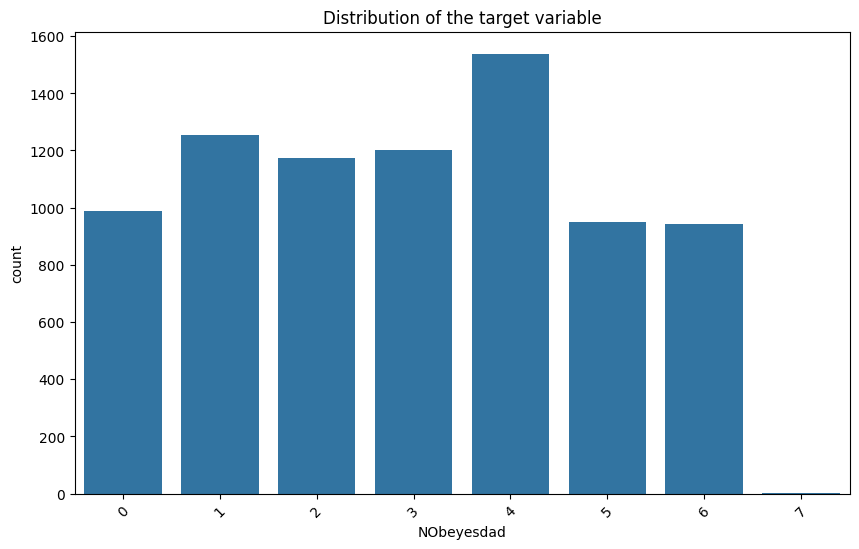

In [123]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=obesity_train)
plt.title('Distribution of the target variable')
plt.xticks(rotation=45)
plt.show()

There are no non-numeric columns in the dataset.


# Preprocessing

Transform object to int

### Train Data

In [18]:
la=LabelEncoder()

In [19]:
ob=obesity_train.select_dtypes(include='object')
non_ob=obesity_train.select_dtypes(exclude='object')

In [20]:
ob.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [21]:
non_ob.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721


In [22]:
for i in range(0,ob.shape[1]):
    ob.iloc[:,i]=la.fit_transform(ob.iloc[:,i])

In [23]:
ob.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6


In [24]:
ob=ob.astype('int')

In [25]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          8050 non-null   int64
 1   family_history_with_overweight  8050 non-null   int64
 2   FAVC                            8050 non-null   int64
 3   CAEC                            8050 non-null   int64
 4   SMOKE                           8050 non-null   int64
 5   SCC                             8050 non-null   int64
 6   CALC                            8050 non-null   int64
 7   MTRANS                          8050 non-null   int64
 8   NObeyesdad                      8050 non-null   int64
dtypes: int64(9)
memory usage: 566.1 KB


In [26]:
obesity_train=pd.concat([ob,non_ob],axis=1)

In [27]:
obesity_train

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,1,1,1,2,0,0,2,3,2,8045,18.000000,1.783914,108.251044,2.000000,2.120936,2.111913,1.000000,0.000000
8046,1,1,1,2,0,0,1,3,3,8046,27.394123,1.755978,112.256165,1.369529,3.000000,2.011023,0.038809,0.000000
8047,1,1,1,2,0,0,1,0,5,8047,26.000000,1.700000,75.000000,3.000000,3.000000,2.000000,1.000000,0.000000
8048,1,1,1,2,0,0,1,3,5,8048,21.140165,1.807029,75.688433,2.000000,3.000000,1.791286,1.601950,0.965464


### Test Data

In [28]:
obj=obesity_test.select_dtypes(include='object')
non_obj=obesity_test.select_dtypes(exclude='object')

In [29]:
obj.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
3,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [30]:
non_obj.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069


In [31]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])

In [32]:
obj.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,1,1,1,2,0,0,2,3
1,0,1,1,2,0,0,2,3
2,0,1,1,2,0,0,2,3
3,1,1,1,2,0,0,2,3
4,0,1,1,2,0,0,2,3


In [33]:
obj=obj.astype('int')

In [34]:
obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          13840 non-null  int64
 1   family_history_with_overweight  13840 non-null  int64
 2   FAVC                            13840 non-null  int64
 3   CAEC                            13840 non-null  int64
 4   SMOKE                           13840 non-null  int64
 5   SCC                             13840 non-null  int64
 6   CALC                            13840 non-null  int64
 7   MTRANS                          13840 non-null  int64
dtypes: int64(8)
memory usage: 865.1 KB


In [35]:
obesity_test=pd.concat([obj,non_obj],axis=1)

In [36]:
obesity_test

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,1,0,2,0,0,2,3,34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632
13836,0,0,1,2,0,0,2,3,34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000
13837,0,0,1,1,0,0,2,3,34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000
13838,1,1,1,2,0,0,3,3,34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000


scaler for large number

In [37]:
ss=StandardScaler()

In [38]:
obesity_test['Age']=ss.fit_transform(obesity_test[['Age']])
obesity_test['Weight']=ss.fit_transform(obesity_test[['Weight']])

In [39]:
obesity_test

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,2,3,20758,0.508163,1.848294,1.273786,2.938616,3.000000,2.825629,0.855400,0.000000
1,0,1,1,2,0,0,2,3,20759,-0.509128,1.600000,-0.818988,2.000000,1.000000,3.000000,1.000000,0.000000
2,0,1,1,2,0,0,2,3,20760,0.353000,1.643355,0.927432,3.000000,3.000000,2.621877,0.000000,0.250502
3,1,1,1,2,0,0,2,3,20761,-0.512705,1.553127,0.623672,2.000000,2.977909,2.786417,0.094851,0.000000
4,0,1,1,2,0,0,2,3,20762,0.353000,1.627396,0.668336,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,1,0,2,0,0,2,3,34593,-0.107749,1.721384,-0.358246,2.813234,3.000000,1.000000,0.807076,0.778632
13836,0,0,1,2,0,0,2,3,34594,0.870277,1.590000,-0.972181,3.000000,3.000000,2.000000,0.000000,0.000000
13837,0,0,1,1,0,0,2,3,34595,-0.175379,1.585547,-1.647125,3.000000,2.273740,2.000000,1.949840,1.000000
13838,1,1,1,2,0,0,3,3,34596,-0.509128,1.620000,-1.316865,2.000000,3.000000,2.000000,3.000000,2.000000


In [40]:
obesity_train['Age']=ss.fit_transform(obesity_train[['Age']])
obesity_train['Weight']=ss.fit_transform(obesity_train[['Weight']])

In [41]:
obesity_train

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,1,1,2,0,0,1,3,6,0,0.113484,1.699998,-0.219878,2.000000,2.983297,2.763573,0.000000,0.976473
1,0,1,1,1,0,0,2,0,1,1,-1.020175,1.560000,-1.158152,2.000000,3.000000,2.000000,1.000000,1.000000
2,0,1,1,2,0,0,2,3,0,2,-1.020175,1.711460,-1.418080,1.880534,1.411685,1.910378,0.866045,1.673584
3,0,1,1,2,0,0,1,3,4,3,-0.500636,1.710730,1.666748,3.000000,3.000000,1.674061,1.467863,0.780199
4,1,1,1,2,0,0,1,3,6,4,1.379997,1.914186,0.241391,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,1,1,1,2,0,0,2,3,2,8045,-1.020175,1.783914,0.791082,2.000000,2.120936,2.111913,1.000000,0.000000
8046,1,1,1,2,0,0,1,3,3,8046,0.632737,1.755978,0.943409,1.369529,3.000000,2.011023,0.038809,0.000000
8047,1,1,1,2,0,0,1,0,5,8047,0.387439,1.700000,-0.473557,3.000000,3.000000,2.000000,1.000000,0.000000
8048,1,1,1,2,0,0,1,3,5,8048,-0.467658,1.807029,-0.447374,2.000000,3.000000,1.791286,1.601950,0.965464


# Build Model

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

x=obesity_train.drop(['NObeyesdad','id'],axis=1)
y=obesity_train['NObeyesdad']

In [43]:
print(x.isna().sum())

Gender                            0
family_history_with_overweight    0
FAVC                              0
CAEC                              0
SMOKE                             0
SCC                               0
CALC                              0
MTRANS                            0
Age                               0
Height                            1
Weight                            1
FCVC                              1
NCP                               1
CH2O                              1
FAF                               1
TUE                               1
dtype: int64


In [44]:
imputer = SimpleImputer(strategy='mean') # Create an imputer object
x = imputer.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### Logistic Regression

In [46]:
Model_LR=LogisticRegression()

In [47]:
Model_LR.fit(x_train,y_train)

LogisticRegression()

In [48]:
Model_LR.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1])

In [49]:
print(classification_report(Model_LR.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       220
           1       0.68      0.75      0.72       224
           2       0.79      0.76      0.77       248
           3       0.93      0.91      0.92       237
           4       1.00      1.00      1.00       316
           5       0.59      0.59      0.59       191
           6       0.56      0.62      0.59       174

    accuracy                           0.80      1610
   macro avg       0.78      0.78      0.78      1610
weighted avg       0.80      0.80      0.80      1610



GridSearchCV for LogisticRegression

In [89]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [90]:
from sklearn.model_selection import GridSearchCV

Model_LR = LogisticRegression()
grid_search = GridSearchCV(estimator=Model_LR, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [91]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [92]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8190993788819876


In [93]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       215
           1       0.73      0.79      0.76       230
           2       0.82      0.80      0.81       247
           3       0.95      0.92      0.94       240
           4       1.00      1.00      1.00       315
           5       0.59      0.60      0.60       188
           6       0.59      0.65      0.61       175

    accuracy                           0.82      1610
   macro avg       0.80      0.80      0.80      1610
weighted avg       0.83      0.82      0.82      1610



#### RandomForestClassifier

In [50]:
Model_RF=RandomForestClassifier()

In [51]:
Model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
Model_RF.predict(x_test)

array([0, 0, 1, ..., 1, 1, 1])

In [53]:
print(classification_report(Model_RF.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       200
           1       0.86      0.84      0.85       255
           2       0.87      0.87      0.87       239
           3       0.97      0.96      0.96       234
           4       1.00      1.00      1.00       315
           5       0.73      0.79      0.76       177
           6       0.78      0.79      0.79       190

    accuracy                           0.89      1610
   macro avg       0.88      0.88      0.88      1610
weighted avg       0.89      0.89      0.89      1610



GridSearchCV for Random Forest

In [94]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [95]:
from sklearn.model_selection import GridSearchCV

Model_RF = RandomForestClassifier()
grid_search = GridSearchCV(estimator=Model_RF, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [96]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [97]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8880434782608695


In [98]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       198
           1       0.86      0.85      0.86       250
           2       0.88      0.86      0.87       244
           3       0.97      0.95      0.96       236
           4       1.00      1.00      1.00       315
           5       0.74      0.80      0.77       178
           6       0.79      0.80      0.80       189

    accuracy                           0.89      1610
   macro avg       0.88      0.88      0.88      1610
weighted avg       0.89      0.89      0.89      1610



#### GaussianNB

In [54]:
Model_GNB=GaussianNB()

In [55]:
Model_GNB.fit(x_train,y_train)

GaussianNB()

In [56]:
Model_GNB.predict(x_test)

array([0, 0, 1, ..., 2, 1, 1])

In [57]:
print(classification_report(Model_GNB.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       243
           1       0.43      0.69      0.53       154
           2       0.41      0.43      0.42       230
           3       0.99      0.51      0.67       452
           4       1.00      0.97      0.98       325
           5       0.31      0.57      0.40       104
           6       0.24      0.46      0.32       102

    accuracy                           0.63      1610
   macro avg       0.61      0.61      0.58      1610
weighted avg       0.74      0.63      0.66      1610



Using GridSearch CV for Gaussian Naive Bayes

In [99]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [100]:
from sklearn.model_selection import GridSearchCV

Model_GNB = GaussianNB()
grid_search = GridSearchCV(estimator=Model_GNB, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [101]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [102]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'var_smoothing': 1e-05}
Best Score: 0.6503105590062112


In [103]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       243
           1       0.43      0.69      0.53       154
           2       0.52      0.41      0.46       299
           3       0.97      0.61      0.75       367
           4       1.00      0.97      0.98       325
           5       0.31      0.57      0.40       104
           6       0.28      0.47      0.35       118

    accuracy                           0.65      1610
   macro avg       0.62      0.63      0.60      1610
weighted avg       0.73      0.65      0.67      1610



#### SVC

In [58]:
Model_SVC=SVC()

In [59]:
Model_SVC.fit(x_train,y_train)

SVC()

In [60]:
Model_SVC.predict(x_test)

array([0, 0, 1, ..., 1, 1, 1])

In [61]:
print(classification_report(Model_SVC.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       224
           1       0.72      0.79      0.76       226
           2       0.82      0.82      0.82       239
           3       0.97      0.93      0.95       243
           4       1.00      1.00      1.00       315
           5       0.56      0.63      0.59       171
           6       0.65      0.66      0.65       192

    accuracy                           0.83      1610
   macro avg       0.81      0.80      0.81      1610
weighted avg       0.83      0.83      0.83      1610



GridSearch CV for SVC

In [104]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [105]:
from sklearn.model_selection import GridSearchCV

Model_SVC = SVC()
grid_search = GridSearchCV(estimator=Model_SVC, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [106]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [107]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.8628881987577639


In [108]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       206
           1       0.80      0.87      0.83       229
           2       0.84      0.82      0.83       246
           3       0.95      0.92      0.93       239
           4       1.00      1.00      1.00       316
           5       0.72      0.71      0.71       193
           6       0.66      0.71      0.68       181

    accuracy                           0.86      1610
   macro avg       0.84      0.84      0.84      1610
weighted avg       0.86      0.86      0.86      1610



#### XGBClassifier

In [62]:
Model_XGB=XGBClassifier()

In [63]:
Model_XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
Model_XGB.predict(x_test)

array([0, 0, 1, ..., 1, 1, 1])

In [65]:
print(classification_report(Model_XGB.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       208
           1       0.85      0.88      0.86       239
           2       0.87      0.86      0.86       243
           3       0.96      0.95      0.95       234
           4       1.00      1.00      1.00       316
           5       0.76      0.79      0.78       185
           6       0.76      0.79      0.77       185

    accuracy                           0.89      1610
   macro avg       0.88      0.88      0.88      1610
weighted avg       0.89      0.89      0.89      1610



GridSearch CV for XGBoostClassifier

In [109]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [110]:
from sklearn.model_selection import GridSearchCV

Model_XGB = XGBClassifier()
grid_search = GridSearchCV(estimator=Model_XGB, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [111]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [112]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.8993788819875776


In [113]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       207
           1       0.84      0.88      0.86       237
           2       0.89      0.88      0.88       242
           3       0.97      0.96      0.97       234
           4       1.00      1.00      1.00       316
           5       0.78      0.81      0.79       185
           6       0.79      0.81      0.80       189

    accuracy                           0.90      1610
   macro avg       0.89      0.89      0.89      1610
weighted avg       0.90      0.90      0.90      1610



#### GradientBoostingClassifier

In [66]:
Model_GBoosting=GradientBoostingClassifier()

In [67]:
Model_GBoosting.fit(x_train,y_train)

GradientBoostingClassifier()

In [68]:
Model_GBoosting.predict(x_test)

array([0, 0, 1, ..., 1, 1, 5])

In [69]:
print(classification_report(Model_GBoosting.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       209
           1       0.83      0.90      0.86       229
           2       0.89      0.86      0.87       247
           3       0.97      0.96      0.96       235
           4       1.00      1.00      1.00       315
           5       0.77      0.79      0.78       186
           6       0.76      0.78      0.77       189

    accuracy                           0.89      1610
   macro avg       0.88      0.88      0.88      1610
weighted avg       0.89      0.89      0.89      1610



GridSearchCV for GradientBoost

In [118]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [119]:
from sklearn.model_selection import GridSearchCV

Model_GBoosting = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=Model_GBoosting, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_pred, y_test))

# Optimization

In [70]:
prim_grid={'n_estimators':[100,200,300],
           'learning_rate':[0.1,0.01,0.001],
           'max_depth':[3,5,7]}
scorer="accuracy"

#### XGBClassifier

In [71]:
Model_XGB=GridSearchCV(Model_XGB,prim_grid,scoring=scorer,n_jobs=-1)
Model_XGB.fit(x_train,y_train)
print(Model_XGB.best_params_)
print(Model_XGB.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.8951863354037266


In [72]:
Model_XGB=XGBClassifier({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})

In [73]:
Model_XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
Model_XGB.predict(x_test)

array([0, 0, 1, ..., 1, 1, 1])

In [75]:
print(classification_report(Model_XGB.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       208
           1       0.85      0.88      0.86       239
           2       0.87      0.86      0.86       243
           3       0.96      0.95      0.95       234
           4       1.00      1.00      1.00       316
           5       0.76      0.79      0.78       185
           6       0.76      0.79      0.77       185

    accuracy                           0.89      1610
   macro avg       0.88      0.88      0.88      1610
weighted avg       0.89      0.89      0.89      1610



AdaBoost


In [76]:
from sklearn.ensemble import AdaBoostClassifier
Model_AdaBoost = AdaBoostClassifier(random_state=42)

In [77]:
Model_AdaBoost.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [78]:
y_pred_ada = Model_AdaBoost.predict(x_test)

print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.52      0.16      0.24       190
           1       0.40      0.85      0.55       248
           2       0.00      0.00      0.00       240
           3       0.00      0.00      0.00       232
           4       0.51      1.00      0.67       316
           5       0.83      0.03      0.05       191
           6       0.43      0.91      0.59       193

    accuracy                           0.46      1610
   macro avg       0.39      0.42      0.30      1610
weighted avg       0.37      0.46      0.32      1610



optimization using GridSearchCV

In [79]:

from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [81]:
ada_boost = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [82]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best Score: 0.4631987577639752


Testing


In [84]:
test_x=obesity_test.drop(['id'],axis=1)

In [85]:
pred=Model_XGB.predict(test_x)

In [86]:
df=pd.DataFrame({'id':obesity_test['id'],'NObeyesdad':pred})

In [87]:
df

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4
...,...,...
13835,34593,6
13836,34594,1
13837,34595,0
13838,34596,1


In [88]:
df.to_csv("sub.csv",index=False)